### Blok 1: Monte Carlo simulace tří metod (Bertrandův paradox)
Tento blok spouští simulaci, která ukazuje klasický **Bertrandův paradox**. Generuje náhodné sečny v kruhu třemi různými způsoby:
1. **Náhodné krajní body:** Rovnoměrný výběr dvou bodů na obvodu kružnice.
2. **Náhodný poloměr:** Rovnoměrný výběr bodu na poloměru (a sestrojení kolmice).
3. **Náhodný střed sečny:** Rovnoměrný výběr středu sečny kdekoliv na ploše kruhu.

Vykresluje ukázku vygenerovaných sečen a empiricky počítá pravděpodobnost, že je sečna delší než strana vepsaného rovnostranného trojúhelníku (zelené = splňují, oranžové = nesplňují).

Spouštím Monte Carlo simulaci a generuji grafy. Prosím čekejte...


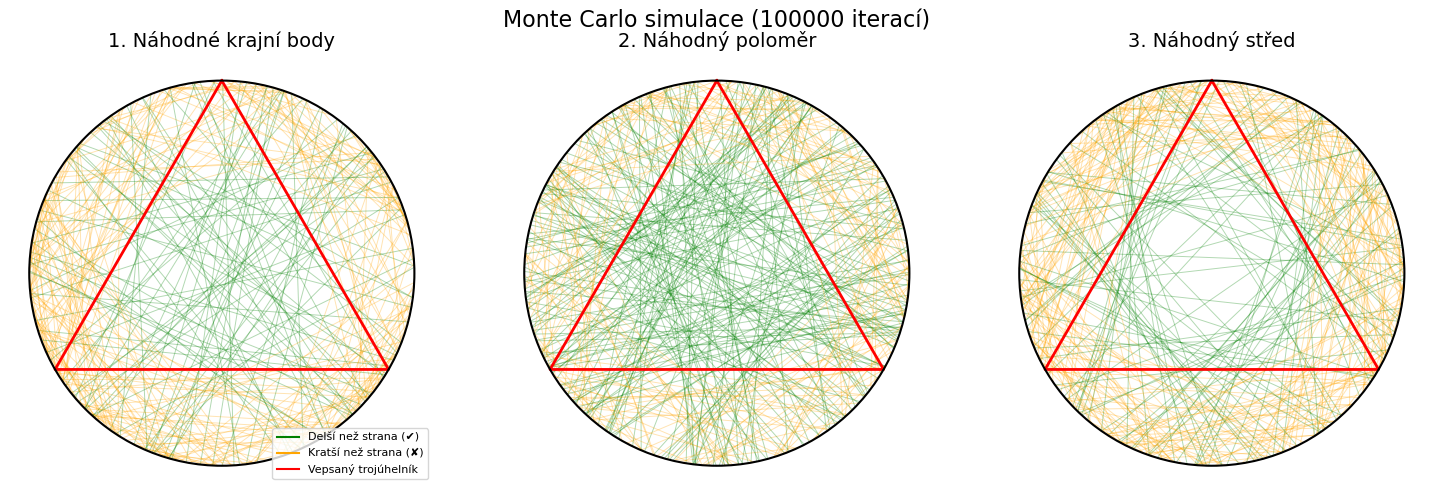

Metoda                       | Simulace  | Teorie   | Odchylka
------------------------------------------------------------
1. Náhodné krajní body       | 0.3307    | 0.3333   | ±0.0026
2. Náhodný poloměr           | 0.4988    | 0.5000   | ±0.0012
3. Náhodný střed sečny       | 0.2485    | 0.2500   | ±0.0015


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Circle

# =====================================================================
# BLOK 1: MONTE CARLO SIMULACE A VÝPIS VÝSLEDKŮ
# =====================================================================
print("Spouštím Monte Carlo simulaci a generuji grafy. Prosím čekejte...")

R = 1
side_len = R * np.sqrt(3)
N_sim = 100000  
N_plot = 300   

fig1, axes1 = plt.subplots(1, 3, figsize=(15, 5))
titles1 = ['1. Náhodné krajní body', '2. Náhodný poloměr', '3. Náhodný střed']
probs = []

for i in range(3):
    ax = axes1[i]
    ax.add_patch(Circle((0, 0), R, color='black', fill=False, linewidth=1.5, zorder=5))
    t_angles = np.array([np.pi/2, np.pi/2 + 2*np.pi/3, np.pi/2 + 4*np.pi/3])
    tx, ty = R * np.cos(t_angles), R * np.sin(t_angles)
    ax.plot(np.append(tx, tx[0]), np.append(ty, ty[0]), 'r-', linewidth=2, zorder=4)
    ax.set(xlim=(-1.1, 1.1), ylim=(-1.1, 1.1), aspect='equal')
    ax.axis('off')
    ax.set_title(titles1[i], fontsize=14, pad=10)

# Metoda 1
theta1 = np.random.uniform(0, 2*np.pi, N_sim)
theta2 = np.random.uniform(0, 2*np.pi, N_sim)
lengths1 = np.sqrt((R*np.cos(theta1) - R*np.cos(theta2))**2 + (R*np.sin(theta1) - R*np.sin(theta2))**2)
probs.append(np.mean(lengths1 > side_len))
for j in range(N_plot):
    c = 'green' if lengths1[j] > side_len else 'orange'
    axes1[0].plot([R*np.cos(theta1[j]), R*np.cos(theta2[j])], 
                  [R*np.sin(theta1[j]), R*np.sin(theta2[j])], color=c, alpha=0.3, linewidth=0.7)

# Metoda 2
theta_rad = np.random.uniform(0, 2*np.pi, N_sim)
r_dist = np.random.uniform(0, R, N_sim)
lengths2 = 2 * np.sqrt(R**2 - r_dist**2)
probs.append(np.mean(lengths2 > side_len))
for j in range(N_plot):
    c = 'green' if lengths2[j] > side_len else 'orange'
    mx, my = r_dist[j] * np.cos(theta_rad[j]), r_dist[j] * np.sin(theta_rad[j])
    angle = theta_rad[j] + np.pi/2
    hl = lengths2[j] / 2
    axes1[1].plot([mx + hl*np.cos(angle), mx - hl*np.cos(angle)], 
                  [my + hl*np.sin(angle), my - hl*np.sin(angle)], color=c, alpha=0.3, linewidth=0.7)

# Metoda 3
theta_mid = np.random.uniform(0, 2*np.pi, N_sim)
r_mid = R * np.sqrt(np.random.uniform(0, 1, N_sim))
lengths3 = 2 * np.sqrt(R**2 - r_mid**2)
probs.append(np.mean(lengths3 > side_len))
for j in range(N_plot):
    c = 'green' if lengths3[j] > side_len else 'orange'
    mx, my = r_mid[j] * np.cos(theta_mid[j]), r_mid[j] * np.sin(theta_mid[j])
    angle = theta_mid[j] + np.pi/2
    hl = lengths3[j] / 2
    axes1[2].plot([mx + hl*np.cos(angle), mx - hl*np.cos(angle)], 
                  [my + hl*np.sin(angle), my - hl*np.sin(angle)], color=c, alpha=0.3, linewidth=0.7)

axes1[0].legend(handles=[mlines.Line2D([], [], color='green', label='Delší než strana (\u2714)'),
                         mlines.Line2D([], [], color='orange', label='Kratší než strana (\u2718)'),
                         mlines.Line2D([], [], color='red', label='Vepsaný trojúhelník')], loc='lower right', fontsize=8)
fig1.suptitle(f"Monte Carlo simulace ({N_sim} iterací)", fontsize=16)
plt.tight_layout()
plt.show()

# Výpis do konzole
print("="*60)
print(f"{'Metoda':<28} | {'Simulace':<9} | {'Teorie':<8} | {'Odchylka':<8}")
print("-" * 60)
theo_probs = [1/3, 1/2, 1/4]
m_names = ["1. Náhodné krajní body", "2. Náhodný poloměr", "3. Náhodný střed sečny"]
for i in range(3):
    print(f"{m_names[i]:<28} | {probs[i]:.4f}    | {theo_probs[i]:.4f}   | ±{abs(probs[i] - theo_probs[i]):.4f}")
print("="*60)

### Blok 2: Vizualizace prostorů jevů (Množiny)
Grafy vizuálně ohraničují **příznivé jevy** – množinu míst, kam musí padnout náhodný bod, aby byla sečna delší než strana trojúhelníku:
* **Metoda 1:** Bod musí padnout do 1/3 délky obvodu (zelený oblouk).
* **Metoda 2:** Bod musí padnout do 1/2 délky poloměru blíž ke středu (zelená úsečka).
* **Metoda 3:** Bod (střed sečny) musí padnout do 1/4 celkové plochy kruhu (zelený menší kruh).

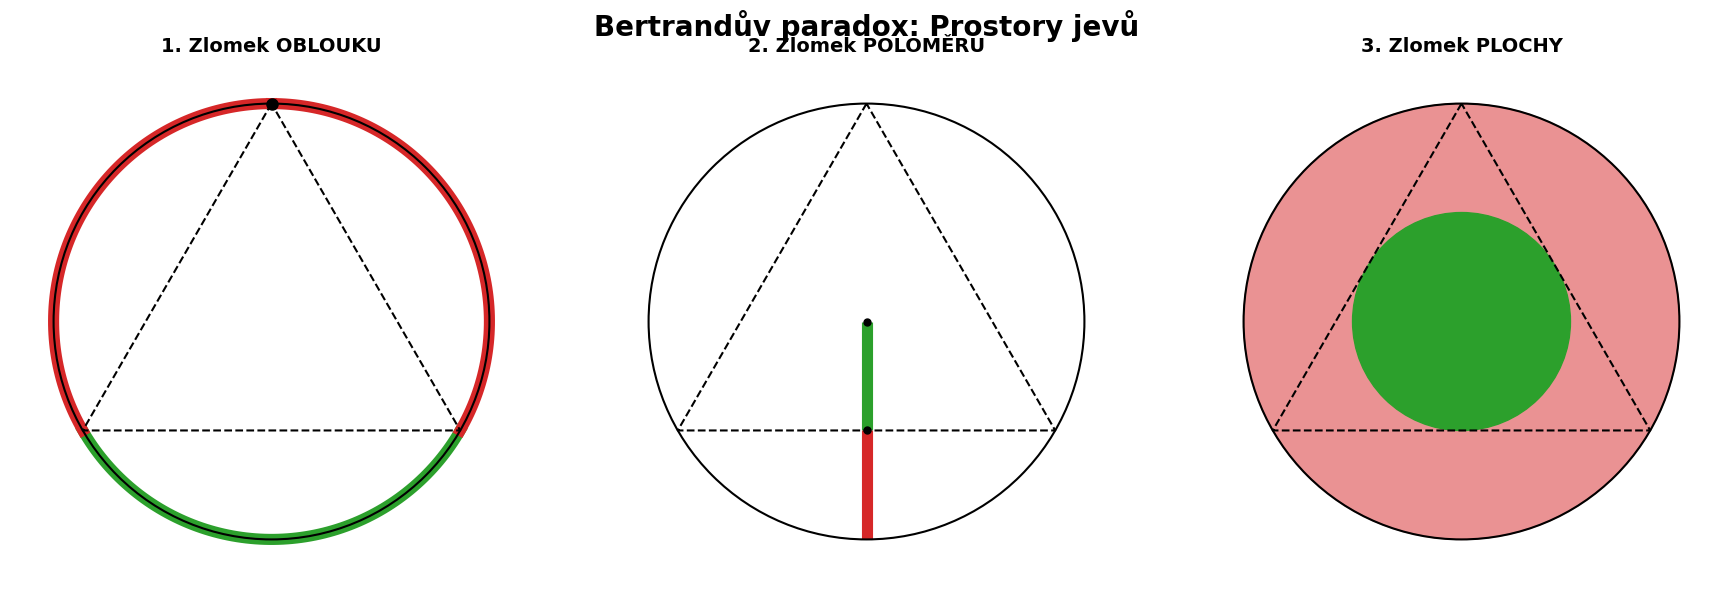

In [27]:
# =====================================================================
# BLOK 2: VIZUALIZACE PROSTORŮ JEVŮ (MNOŽINY)
# =====================================================================
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 6))
titles2 = ["1. Zlomek OBLOUKU", "2. Zlomek POLOMĚRU", "3. Zlomek PLOCHY"]

for i in range(3):
    axes2[i].set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2), aspect='equal')
    axes2[i].axis('off')
    axes2[i].set_title(titles2[i], fontsize=14, fontweight='bold')
    axes2[i].add_patch(Circle((0, 0), R, color='black', fill=False, linewidth=1.5, zorder=5))
    axes2[i].plot(np.append(tx, tx[0]), np.append(ty, ty[0]), 'k--', linewidth=1.5, zorder=4)

# Zlomek oblouku
ax1 = axes2[0]
ax1.plot(tx[0], ty[0], 'ko', markersize=8, zorder=10)
theta_g = np.linspace(t_angles[1], t_angles[2], 100)
ax1.plot(R*np.cos(theta_g), R*np.sin(theta_g), color='#2ca02c', linewidth=8)
ax1.plot(R*np.cos(np.linspace(t_angles[0], t_angles[1], 100)), R*np.sin(np.linspace(t_angles[0], t_angles[1], 100)), color='#d62728', linewidth=8)
ax1.plot(R*np.cos(np.linspace(t_angles[2], t_angles[0]+2*np.pi, 100)), R*np.sin(np.linspace(t_angles[2], t_angles[0]+2*np.pi, 100)), color='#d62728', linewidth=8)

# Zlomek poloměru
ax2 = axes2[1]
ax2.plot([0, 0], [0, -R/2], color='#2ca02c', linewidth=8, solid_capstyle='butt')
ax2.plot([0, 0], [-R/2, -R], color='#d62728', linewidth=8, solid_capstyle='butt')
ax2.plot([0, 0], [0, -R/2], 'ko', markersize=5)

# Zlomek plochy
ax3 = axes2[2]
ax3.add_patch(Circle((0, 0), R, color='#d62728', alpha=0.5))
ax3.add_patch(Circle((0, 0), R/2, color='#2ca02c', alpha=1.0))

fig2.suptitle("Bertrandův paradox: Prostory jevů", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

### Blok 3: Rotace sečny a obalová křivka
Sečna, která má délku přesně rovnu straně vepsaného trojúhelníku, a rotuje o 360 stupňů. 

**Obalovou křivka** – menší kružnice uprostřed o poloměru $R/2$. 

Názorné vykreslení 3. metody: jakákoli sečna, jejíž střed leží uvnitř tohoto menšího kruhu, je zaručeně delší než strana trojúhelníku.

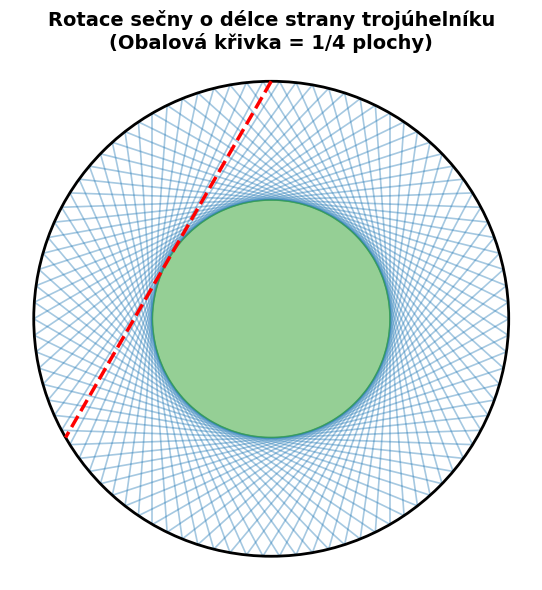

In [28]:
# =====================================================================
# BLOK 3: ROTACE SEČNY (OBALOVÁ KŘIVKA)
# =====================================================================
fig3, ax_rot = plt.subplots(figsize=(6, 6))
ax_rot.set(aspect='equal', xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))
ax_rot.axis('off')

ax_rot.add_patch(Circle((0, 0), R, color='black', fill=False, linewidth=2, zorder=5))
ax_rot.plot(R*np.cos(t_angles[:2]), R*np.sin(t_angles[:2]), 'r--', linewidth=2.5, zorder=6)

for angle in np.linspace(0, 2*np.pi, 90, endpoint=False):
    mx, my = (R/2)*np.cos(angle), (R/2)*np.sin(angle)
    ca = angle + np.pi/2
    hl = np.sqrt(R**2 - (R/2)**2)
    ax_rot.plot([mx + hl*np.cos(ca), mx - hl*np.cos(ca)], 
                [my + hl*np.sin(ca), my - hl*np.sin(ca)], color='#1f77b4', alpha=0.4, linewidth=1.2, zorder=2)

ax_rot.add_patch(Circle((0, 0), R/2, color='#2ca02c', fill=True, alpha=0.5, zorder=3))
ax_rot.set_title("Rotace sečny o délce strany trojúhelníku\n(Obalová křivka = 1/4 plochy)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Blok 4: Histogramy rozložení délek sečen
**Hustota pravděpodobnosti** pro délky sečen. 
Zelená plocha reprezentuje sečny delší než strana trojúhelníku (černá přerušovaná čára značí práh $R\sqrt{3}$). 

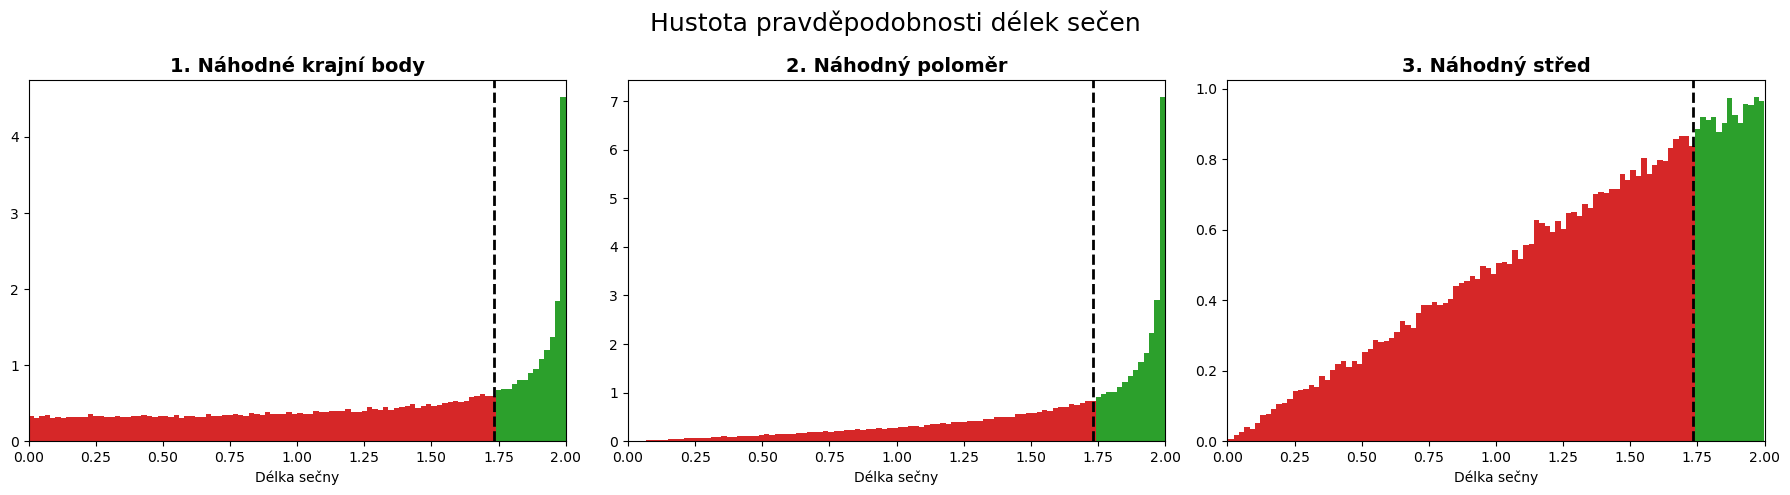

In [29]:
# =====================================================================
# BLOK 4: HISTOGRAMY ROZLOŽENÍ DÉLEK SEČEN
# =====================================================================
fig4, axes4 = plt.subplots(1, 3, figsize=(18, 5))
data = [lengths1, lengths2, lengths3]
for i in range(3):
    ax = axes4[i]
    n, bins, patches = ax.hist(data[i], bins=100, density=True, edgecolor='none')
    for c, p in zip(bins, patches):
        p.set_facecolor('#2ca02c' if c >= side_len else '#d62728')
    ax.axvline(side_len, color='black', linestyle='dashed', linewidth=2)
    ax.set_title(titles1[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('Délka sečny')
    ax.set_xlim(0, 2*R)

fig4.suptitle('Hustota pravděpodobnosti délek sečen', fontsize=18)
plt.tight_layout()
plt.show()

### Blok 5: Nelineární geometrie kruhu (Sinusovka)
Graf ukazuje, proč metoda "Náhodné krajní body" generuje více dlouhých sečen. Závislost délky sečny na vzdálenosti bodů po obvodu není lineární, ale má tvar **sinusoidy**.
Zpočátku (červená zóna) roste délka velmi strmě, ale nahoře (zelená zóna) je křivka plochá. To znamená, že velké množství bodů ležících "naproti sobě" po obvodu generuje sečny o velmi podobné délce (blížící se průměru kružnice).

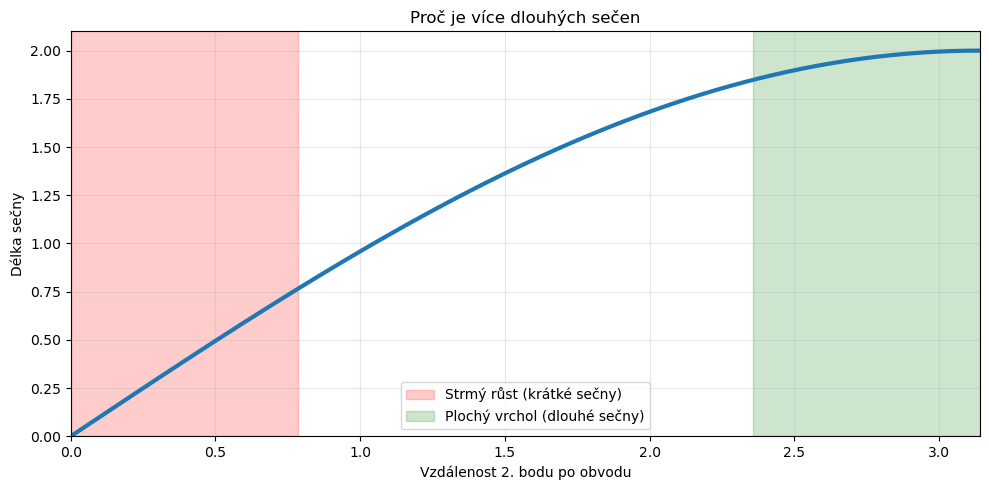

In [30]:
# =====================================================================
# BLOK 5: NELINEÁRNÍ GEOMETRIE KRUHU (SINUSOVKA)
# =====================================================================
arc_len = np.linspace(0, np.pi, 500)
chord_len = 2 * R * np.sin((arc_len / R) / 2)

fig5, ax_sin = plt.subplots(figsize=(10, 5))
ax_sin.plot(arc_len, chord_len, color='#1f77b4', linewidth=3)
ax_sin.axvspan(0, np.pi/4, color='red', alpha=0.2, label='Strmý růst (krátké sečny)')
ax_sin.axvspan(3*np.pi/4, np.pi, color='green', alpha=0.2, label='Plochý vrchol (dlouhé sečny)')
ax_sin.set(title="Proč je více dlouhých sečen", xlabel="Vzdálenost 2. bodu po obvodu", ylabel="Délka sečny", xlim=(0, np.pi), ylim=(0, 2.1))
ax_sin.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Blok 6: Analytický pohled (Integrace a derivace)
Matematický (kalkulový) rozbor závislosti délky sečny $L$ a její pozice po obvodu $s$:
* **Levý graf** ukazuje samotnou funkci $L(s)$ a rychlost její změny (derivaci). 
* **Pravý graf** zkoumá inverzní pohled $s(L)$ a červenou čarou ukazuje **hustotu pravděpodobnosti**. Vysvětluje tím tvar histogramu 1. metody z Bloku 4 – hustota obvodu roste asmyptoticky k nekonečnu, když se délka sečny blíží $2R$ (průměru).

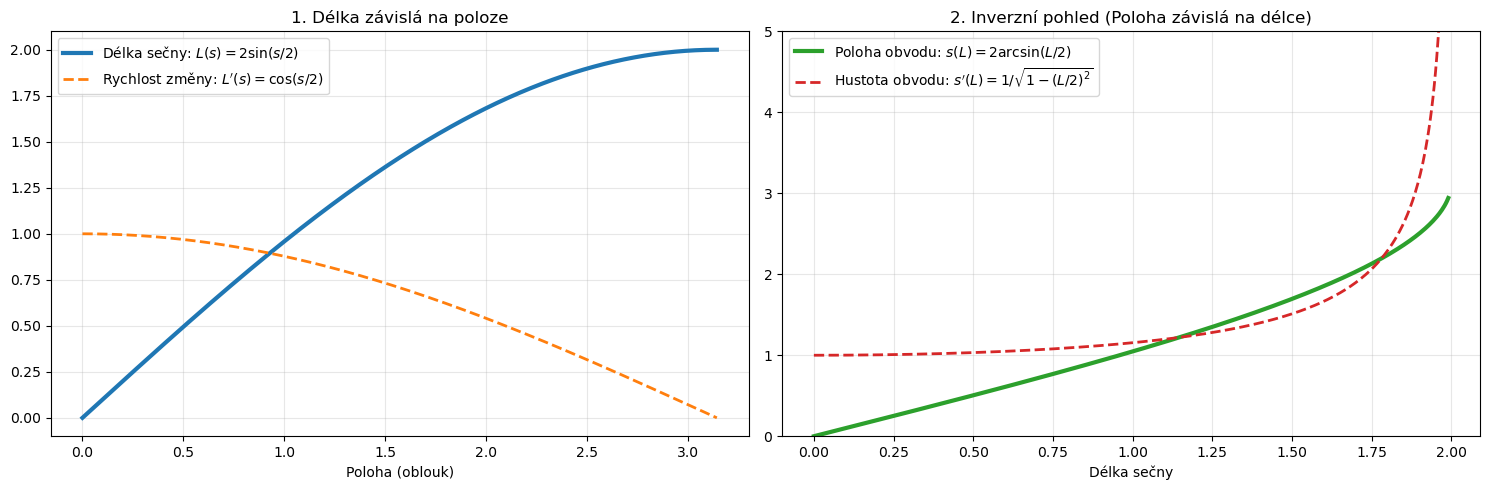

In [31]:
# =====================================================================
# BLOK 6: INTEGRACE A DERIVACE
# =====================================================================
s = np.linspace(0, np.pi, 500)
L = 2 * np.sin(s / 2)
dL_ds = np.cos(s / 2)

L_inv = np.linspace(0, 1.99, 500)
s_inv = 2 * np.arcsin(L_inv / 2)
ds_dL = 1 / np.sqrt(1 - (L_inv / 2)**2)

fig6, (ax6a, ax6b) = plt.subplots(1, 2, figsize=(15, 5))

# Zde přidáno 'r' před uvozovky u labelů
ax6a.plot(s, L, label=r'Délka sečny: $L(s) = 2 \sin(s/2)$', linewidth=3)
ax6a.plot(s, dL_ds, label=r"Rychlost změny: $L'(s) = \cos(s/2)$", linestyle='--', linewidth=2)
ax6a.set(title="1. Délka závislá na poloze", xlabel="Poloha (oblouk)")
ax6a.legend()
ax6a.grid(alpha=0.3)

# Zde také přidáno 'r' před uvozovky (to řeší váš pád u \arcsin)
ax6b.plot(L_inv, s_inv, color='#2ca02c', label=r'Poloha obvodu: $s(L) = 2 \arcsin(L/2)$', linewidth=3)
ax6b.plot(L_inv, ds_dL, color='#d62728', label=r"Hustota obvodu: $s'(L) = 1 / \sqrt{1 - (L/2)^2}$", linestyle='--', linewidth=2)
ax6b.set(title="2. Inverzní pohled (Poloha závislá na délce)", xlabel="Délka sečny", ylim=(0, 5))
ax6b.legend()
ax6b.grid(alpha=0.3)

plt.tight_layout()
plt.show()